In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully")



Libraries imported successfully


In [2]:
df = pd.read_csv(
    "US_Accidents_March23.csv",
    nrows=500000,        # safe size for laptop
    low_memory=False
)

print("Dataset loaded successfully")
df.shape


Dataset loaded successfully


(500000, 46)

In [3]:
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 500000 non-null  object 
 12  City                   499978 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [5]:
df.isnull().sum().sort_values(ascending=False).head(10)


End_Lat              500000
End_Lng              500000
Precipitation(in)    448054
Wind_Chill(F)        437641
Wind_Speed(mph)       89040
Visibility(mi)        10539
Weather_Condition     10185
Humidity(%)            7915
Temperature(F)         7250
Pressure(in)           5739
dtype: int64

In [6]:
cols = [
    "Severity", "Start_Time", "Weather_Condition",
    "Visibility(mi)", "Precipitation(in)",
    "Start_Lat", "Start_Lng"
]

df = df[cols]
df.dropna(inplace=True)

df.shape


(51280, 7)

In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

df["Hour"] = df["Start_Time"].dt.hour
df["Day"] = df["Start_Time"].dt.day_name()


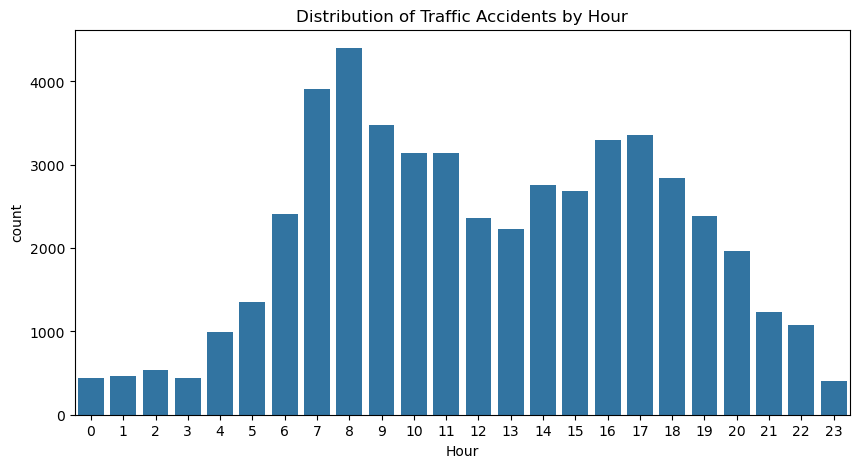

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df)
plt.title("Distribution of Traffic Accidents by Hour")
plt.show()


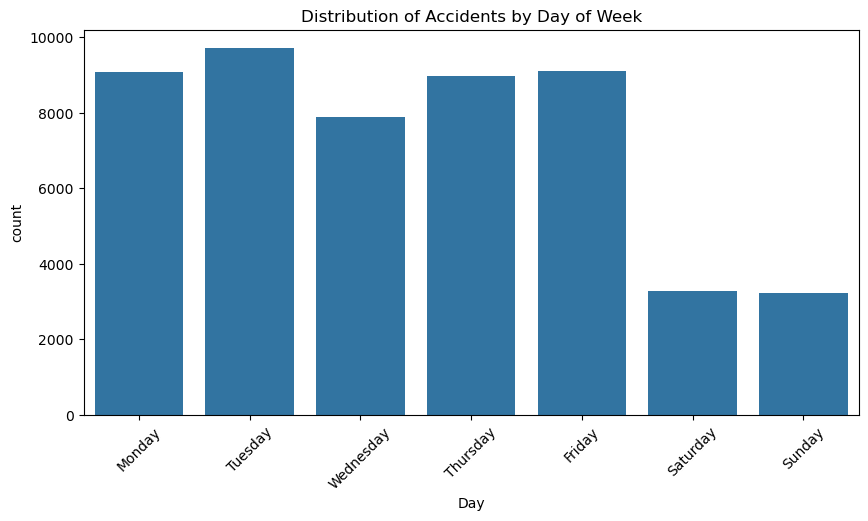

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="Day",
    data=df,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Distribution of Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()


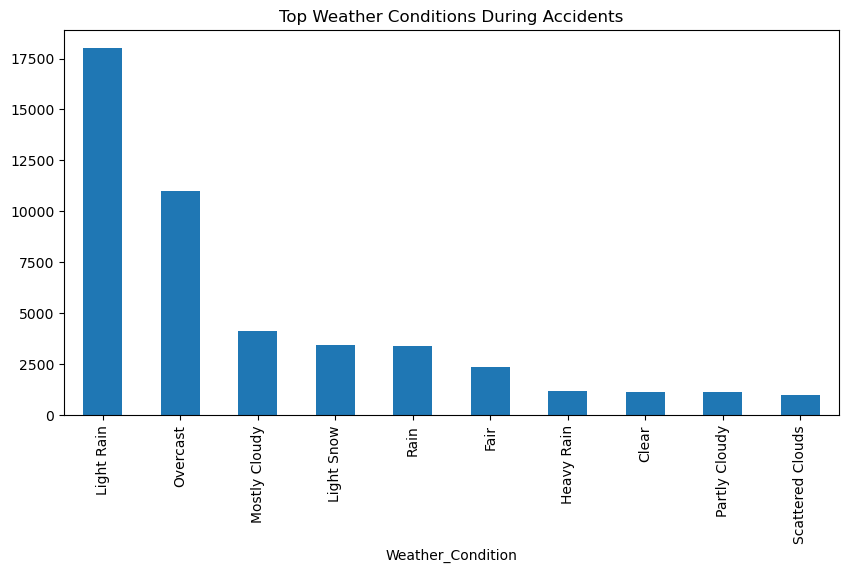

In [10]:
top_weather = df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_weather.plot(kind="bar")
plt.title("Top Weather Conditions During Accidents")
plt.show()


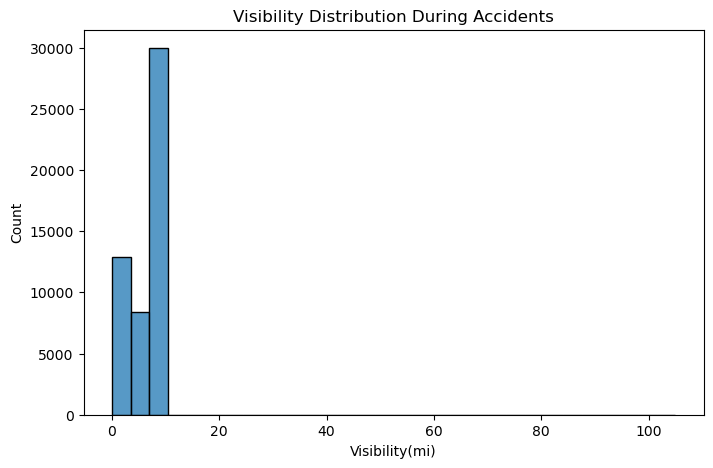

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Visibility(mi)"], bins=30)
plt.title("Visibility Distribution During Accidents")
plt.show()


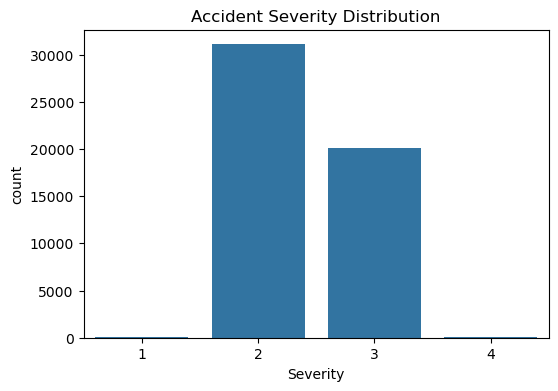

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df)
plt.title("Accident Severity Distribution")
plt.show()


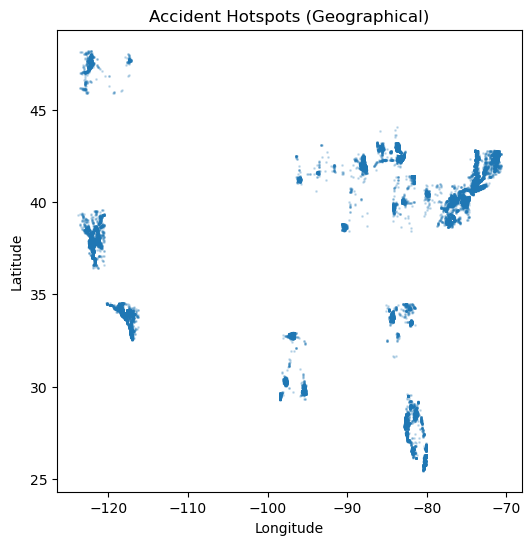

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(
    df["Start_Lng"],
    df["Start_Lat"],
    s=1,
    alpha=0.2
)
plt.title("Accident Hotspots (Geographical)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Key Findings

- Most accidents occur during morning and evening peak hours
- Weekdays show higher accident frequency
- Clear and rainy weather dominate accident conditions
- Majority accidents are Severity level 2
- Accident hotspots are concentrated in urban regions

## Conclusion
Traffic accidents are strongly influenced by time of day, weather conditions,
and visibility. These insights can help traffic authorities in accident
prevention and road safety planning.
